In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/dataset.csv


# **Подготовка датасета**

In [2]:
# Добавление необходимых библиотек в проект
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Чтение датасета в двумерный массив с помощью библиотеки pandas
df_spotify = pd.read_csv('/kaggle/input/spotify/dataset.csv')

In [4]:
# Первые 5 полей полученного массива
df_spotify.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [5]:
# Размерность двумерного массива
df_spotify.shape

(114000, 21)

In [6]:
# ПРоверка значений равных null
missing_values = df_spotify.isnull().sum()

In [7]:
missing_values

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
# Удаление значений равных null
df_spotify.dropna(inplace=True)

In [9]:
# Информация о полях
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

# **EDA и ресерч-анализ. Графики, применение инструментов EDA. Комментарий до графика. Вывод после графика/стат методов. Корреляция колонок с таргетом.**

# **1. Опишем распределение песен по жанрам**

In [11]:
# Распределение по жанрам
genre_counts = df_spotify['track_genre'].value_counts()
genre_counts

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64

In [13]:
# Создание двух подграфиков
fig, axes = plt.subplots(1, 2, figsize=(100, 50))

# 1 подграфик (Bar)
sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=axes[0])
axes[0].set_xlabel('Количество')
axes[0].set_ylabel('Жанр')
axes[0].set_title('Количество песен каждого жанра')

# 2 подграфик (краговая диаграмма)
axes[1].pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Распределение песен по жанрам')
axes[1].axis('equal')  # Равное соотношение сторон гарантирует, что круг будет нарисован в виде круга

plt.tight_layout()

**ВЫВОД: Исходя из этих друх графиков можно сделать вывод о том, что песен каждого жанра одинаковое колличество кроме k-pop. Соответственно, они имеют равные доли от общго количества песен равные 0,9%Из-за большого колличества жанров оба графика нечитаемы, но зато наглядно видно равное распределение песен по жанрам.**


# **2. ТОП-10 артистов по количеству песен:**

In [14]:
# Количсетво артистов и их песен в данном датасете
artist_counts = df_spotify['artists'].value_counts()
artist_counts

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

In [15]:
# ТОП-10 исполнителей по колличеству треков
top10 = artist_counts.head(10)
top10

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

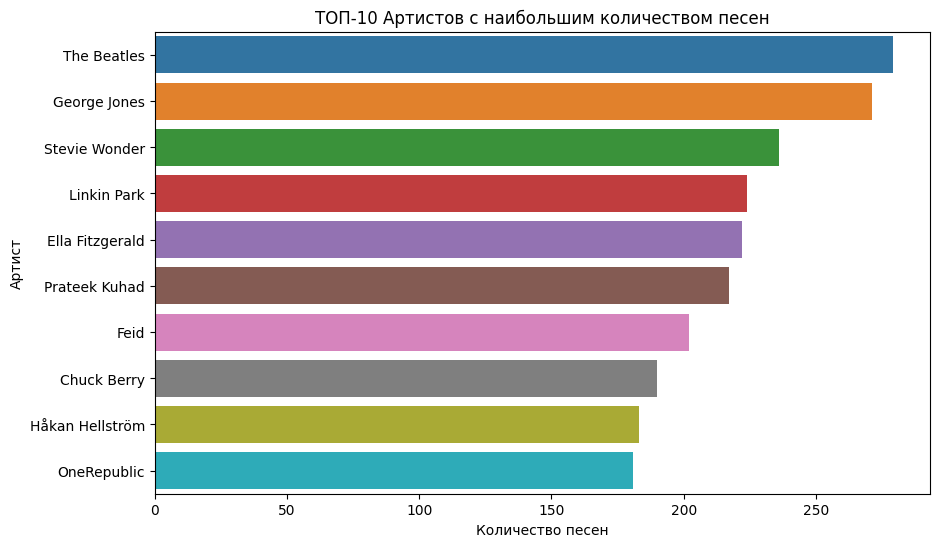

In [16]:
# График распределения артистов с наибольшим колличеством песен
plt.figure(figsize=(10, 6))
sns.barplot(x=top10.values, y=top10.index)
plt.xlabel('Количество песен')
plt.ylabel('Артист')
plt.title('ТОП-10 Артистов с наибольшим количеством песен')
plt.show()
# Исполнителем с наибольшим количеством песен являются The Beatles

**ВЫВОД: Исходя из данного графика, можно сделать вывод о том что в данном датасете исполнителями с наибольшим количеством песен являются The Beatles. Их песен 279. Также можно отметить, что большинство исполнителей с наибольшим количеством песен являются представителями американской джазовой и рок музыки.**

# **3. График распределения альбомов с наибольшим колличеством песен:**

In [17]:
albums = df_spotify["album_name"].value_counts()
albums

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
Me Alcançou                      1
Comunhão e Adoração              1
Força Pra Encarar                1
The Way of the Fist              1
Revelation Songs                 1
Name: count, Length: 46589, dtype: int64

In [18]:
top_album = albums.head(10)
top_album

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
The Complete Hank Williams     111
Fiesta portatil                110
Frescura y Perreo              106
Esto me suena a Farra          105
Perreo en Halloween            103
Name: count, dtype: int64

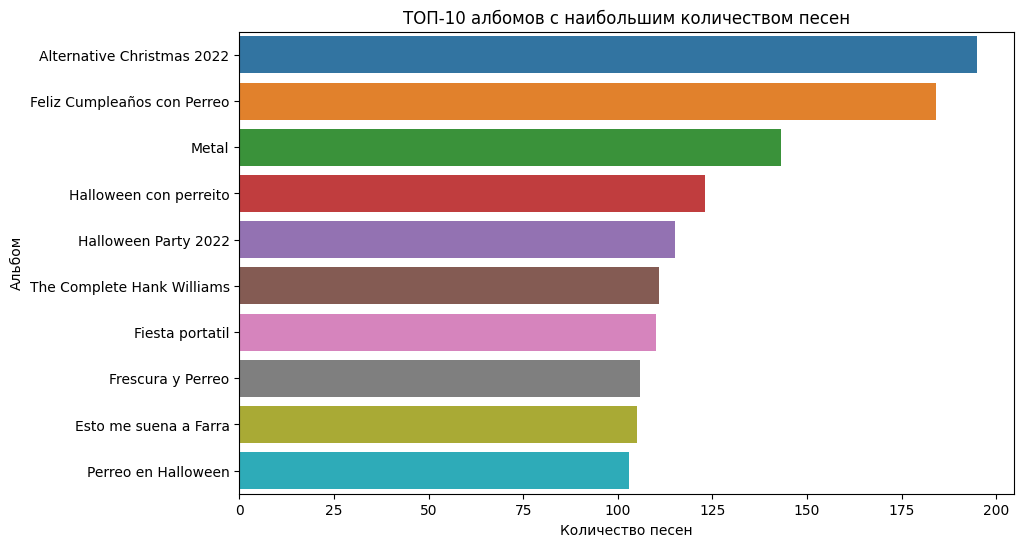

In [19]:
# График распределения альбомов с наибольшим колличеством песен
plt.figure(figsize=(10, 6))
sns.barplot(x=top_album.values, y=top_album.index)
plt.xlabel('Количество песен')
plt.ylabel('Альбом')
plt.title('ТОП-10 албомов с наибольшим количеством песен')
plt.show()

**ВЫВОД: Самым большим является альбом Alternative Cristmas 2022. В него вошли 192 трека. На основе собранных данных можно сделать вывод о том, что больше всего треков объеденено в тематические альбомы. Например альбомы с Рождественскими песнями, Хэллоуинскими песнями или альбом с песнями в стиле Metal.**

In [20]:
keys = df_spotify['key'].value_counts()
keys

key
7     13244
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

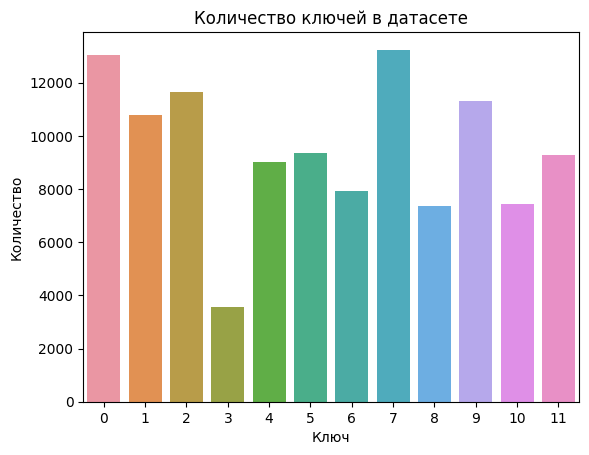

In [21]:
# График ключей с наибольшим колличеством песен
sns.countplot(data=df_spotify, x='key')
plt.title('Количество ключей в датасете')
plt.xlabel('Ключ')
plt.ylabel('Количество')
plt.show()
# Всего в датасете 12 ключей, наибольшее количество песен имеют ключ 7 и 0

# **4. График распределения песен по тональности:**

In [22]:
# Тональность (1 - мажор, 0- минор)
mode = df_spotify['mode'].value_counts()
mode
# Исходя из этих данных, можно сделать вывод о том, что больше песен в мажорной тональности

mode
1    72681
0    41318
Name: count, dtype: int64

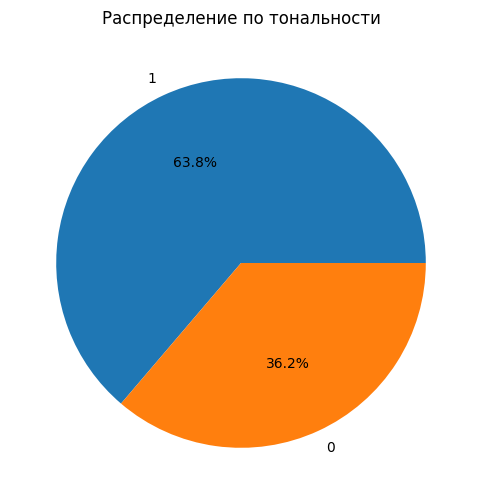

In [23]:
# Распределение тональности (1-мажор, 0-минор)
plt.figure(figsize=(6, 6))
plt.pie(mode, labels=mode.index, autopct='%1.1f%%')
plt.title('Распределение по тональности')
plt.show()
# В датасете больше песен в мажорной тональности (наглядное представление)

**ВЫВОД: Большинство песен в данном датасете в мажорной тональности. Их доля от общего колличества составляет 63,8%**

# **5. График изменения популярности песен**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


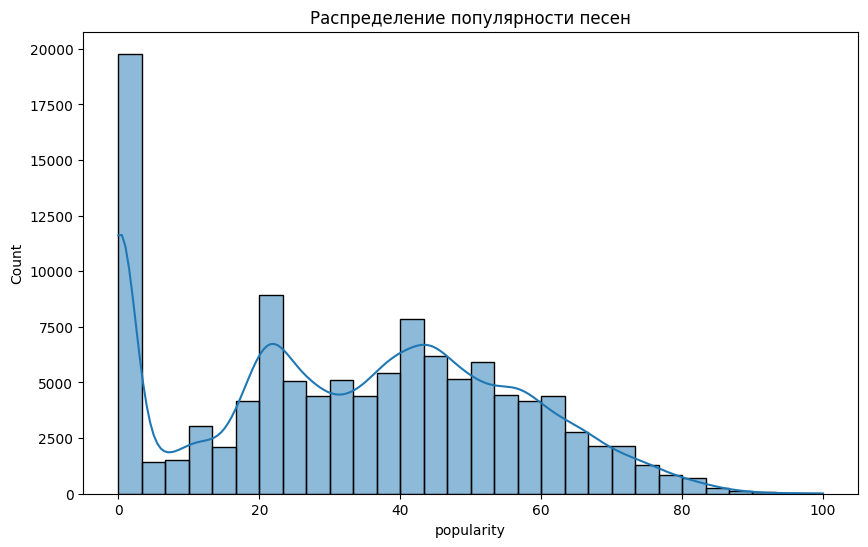

In [24]:
# График изменения популярности песен
plt.figure(figsize=(10, 6))
sns.histplot(df_spotify['popularity'], bins=30, kde=True)
plt.title('Распределение популярности песен')
plt.show()

**ВЫВОД: График распределения популярности песен показывает, что большинство треков обладают популярностью ниже среднего, с максимальным значением в диапазоне 20-40. Высокая популярность (более 60) наблюдается значительно реже, что вполне ожидаемо, поскольку лишь небольшое количество песен достигает статуса хита. Этот график подтверждает, что данные достаточно сбалансированы по уровню популярности, хотя основная масса песен имеет низкие рейтинги. Также можно сделать вывод о том что большинство выпускаемых песен остаются непопулярными (имеют 0 популярность)**

In [25]:
popular = df_spotify['popularity'].value_counts()
popular

popularity
0      16019
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

# **6. Зависимость популярности от артиста**

In [49]:
# Нахождение зависимости популярности от артиста
popularity_by_artist = df_spotify.groupby('artists')['popularity'].mean().astype(int).reset_index()
popularity_by_artist

artists  popularity
0                                                 !nvite          23
1                                  "Puppy Dog Pals" Cast          57
2                                    "Weird Al" Yankovic          26
3      #Kids;Nursery Rhymes;Nursery Rhymes and Kids S...          34
4                                                 $affie          39
...                                                  ...         ...
31432                                                黃仲崑          24
31433                                                 黃妃          24
31434                                                黃小琥          56
31435                                                黃敏華          20
31436                                            龍藏Ryuzo          21

[31437 rows x 2 columns]

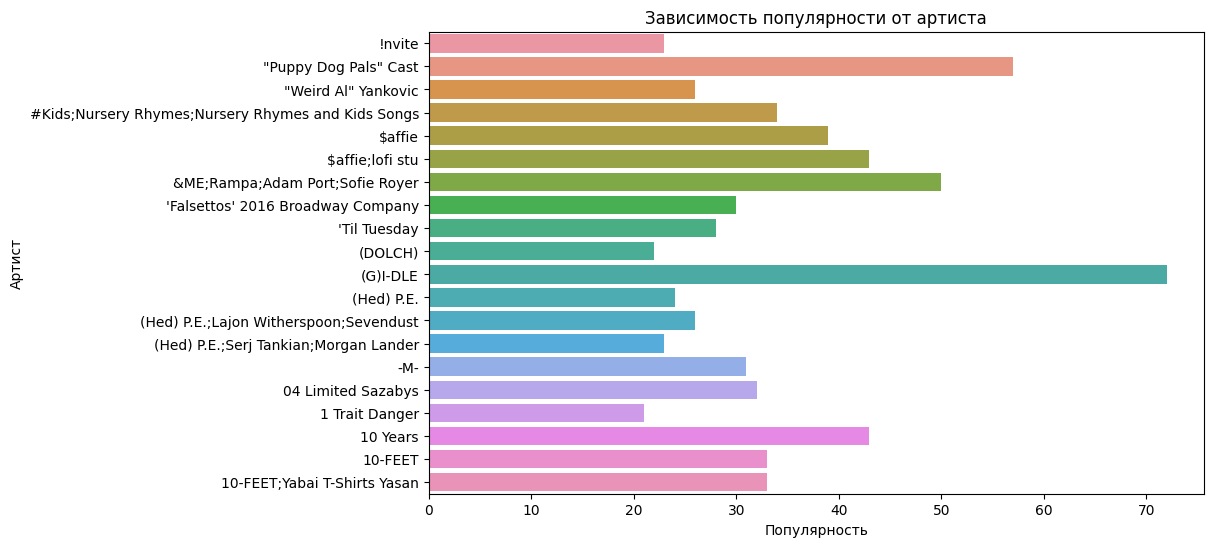

In [50]:
# Проведем выборку первых 20 параметров и построим график
top_pop_artist = popularity_by_artist.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pop_artist["popularity"], y=top_pop_artist["artists"])
#plt.tick_params(axis='x', labelrotation=45)
plt.xlabel('Популярность')
plt.ylabel('Артист')
plt.title('Зависимость популярности от артиста')
plt.show()

**ВЫВОД: Из результатов видим, что выборка содержит очень много странных названий, также некоторые артисты попадаются в паре => Возможен совместный трек, а моя выборка не учитывает этого.**

# **7. Зависимость популярности от количества речтитатива в песне**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


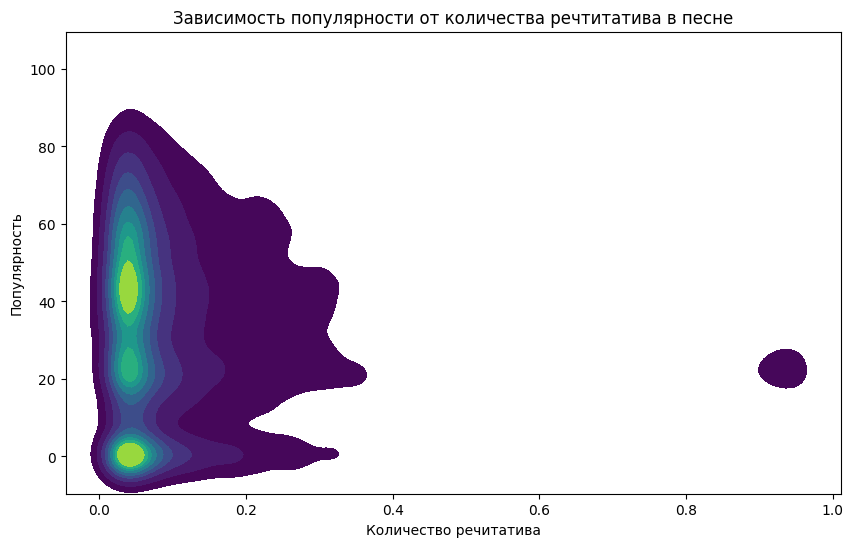

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_spotify, x="speechiness", y="popularity", cmap="viridis", fill=True)
plt.title("Зависимость популярности от количества речтитатива в песне")
plt.xlabel("Количество речитатива")
plt.ylabel("Популярность")
plt.show()

**ВЫВОД: Песни с небольшим колличеством речитатива (от 0 до 0,4) имеют большую популярность, также необычно заметить что популярным песни практически полностью из него состоящие (от 0,9 до 1) - рэп. Песен же со средним колличеством речитатива просто нет**

# **8. Зависимость жанра от артиста**

In [57]:
# Зависимость жанра от артиста
genre_by_artist = df_spotify.groupby(['artists', 'track_genre']).size().reset_index(name='track_count')
genre_by_artist

artists track_genre  \
0                                                 !nvite       study   
1                                  "Puppy Dog Pals" Cast    children   
2                                    "Weird Al" Yankovic      comedy   
3      #Kids;Nursery Rhymes;Nursery Rhymes and Kids S...    children   
4                                                 $affie       study   
...                                                  ...         ...   
41305                                                黃仲崑    mandopop   
41306                                                 黃妃    mandopop   
41307                                                黃小琥    mandopop   
41308                                                黃敏華    cantopop   
41309                                            龍藏Ryuzo      guitar   

       track_count  
0                2  
1                2  
2               15  
3                1  
4                1  
...            ...  
41305            3  
41306            2  
41307            1  
41308            1  
41309            2  

[41310 rows x 3 columns]

In [58]:
# Составим топ жанров по артистам. Так получим, например, что BTS имеют 143 песни в жанре k-pop
# А TheBeatles 149 в жанре psuch-rock 
top_genre_by_artist = genre_by_artist.sort_values('track_count', ascending=False).head(20)
top_genre_by_artist

artists track_genre  track_count
13832                    George Jones  honky-tonk          271
40738               my little airport    cantopop          171
35273                     The Beatles  psych-rock          149
3726                              BTS       k-pop          143
14950                   Hank Williams  honky-tonk          140
14226                       Glee Cast        club          139
15746                 Håkan Hellström        goth          139
21182                     Linkin Park      grunge          131
31967                         Scooter       happy          129
35272                     The Beatles     british          127
26983                     OneRepublic       piano          124
7520                        CoComelon    children          122
11386                 Ella Fitzgerald       blues          112
11387                 Ella Fitzgerald        jazz          110
9352                      Dean Martin        jazz          110
2817                   Arctic Monkeys      garage          109
38522                     Vybz Kartel     j-dance          108
13931                 Germaine Franco      disney          106
11484                   Elvis Presley  rockabilly          105
14953  Hank Williams;Drifting Cowboys  honky-tonk          105

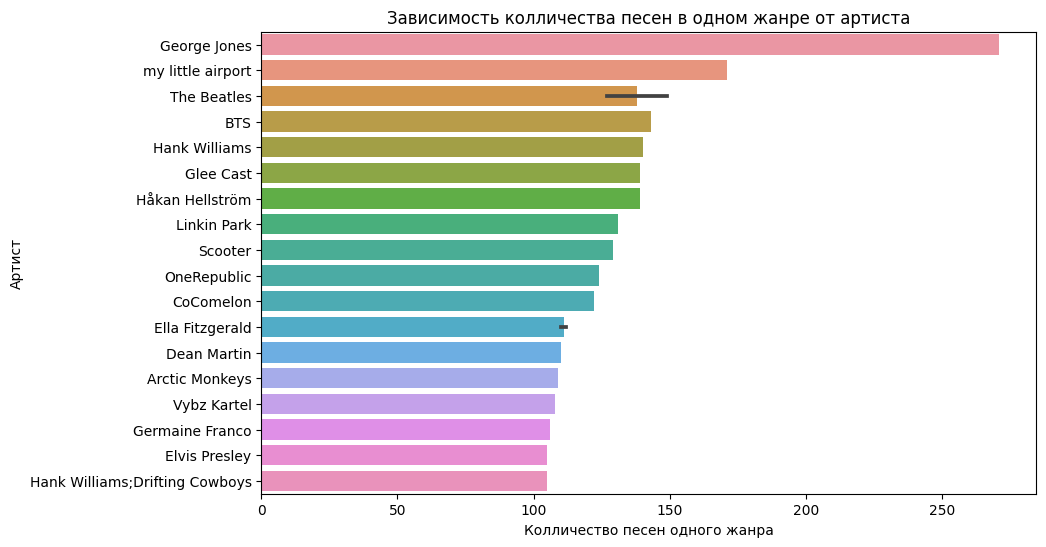

In [59]:
# Распределение жанров по артистам
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genre_by_artist['track_count'], y=top_genre_by_artist['artists'])
plt.xlabel('Колличество песен одного жанра')
plt.ylabel('Артист')
plt.title('Зависимость колличества песен в одном жанре от артиста')
plt.show()

**ВЫВОД: Исходя из данного распределения можно сделать вывод о том, что большинство артистов придерживаются одного жанра во всех своих песнях. Так 271 песня George Jones написана в жанре	honky-tonk, а 143 песни BTS	отнесены к k-pop.**

# **9. Зависимость популярности от жанра песни**

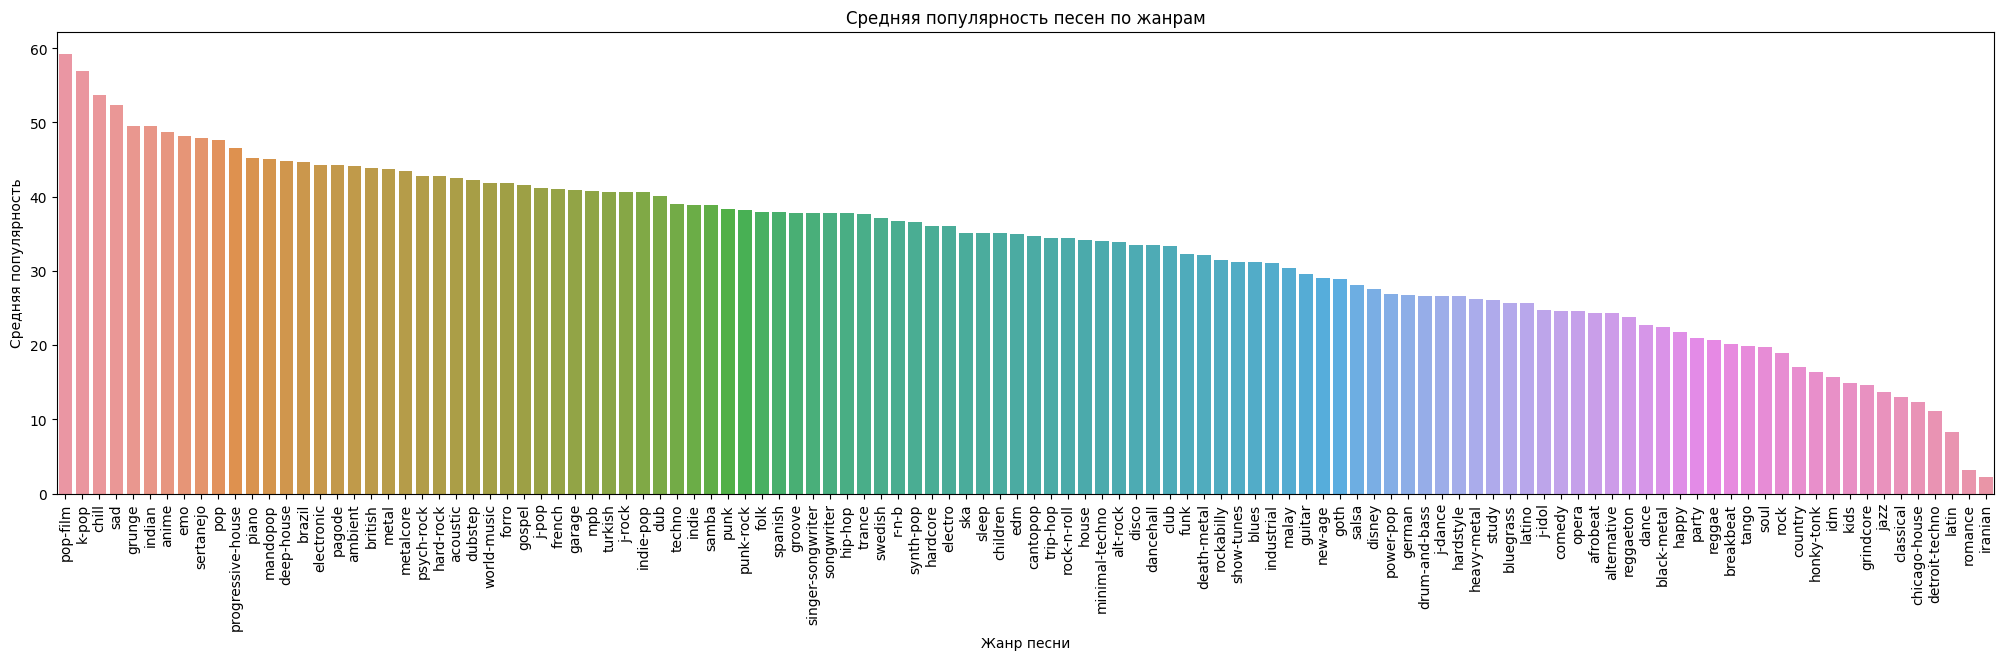

In [64]:
mean_popular_by_genre = df_spotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(25, 6))
sns.barplot(x=mean_popular_by_genre["track_genre"], y=mean_popular_by_genre["popularity"])
plt.title("Средняя популярность песен по жанрам")
plt.xticks(rotation=90)
plt.xlabel("Жанр песни")
plt.ylabel("Средняя популярность")
plt.show()

**ВЫВОД: На основе данного графика можно сделать вывод о том, какие жанры являются наиболее популярными в данном датасете. Явно видно, что наибольшей популярностью пользуются треки в жанре pop-film, k-pop, chill и sad. Их средняя популярность больше 60.**

# **10. Зависимость популярности трека от наличия нецензурной лексики**

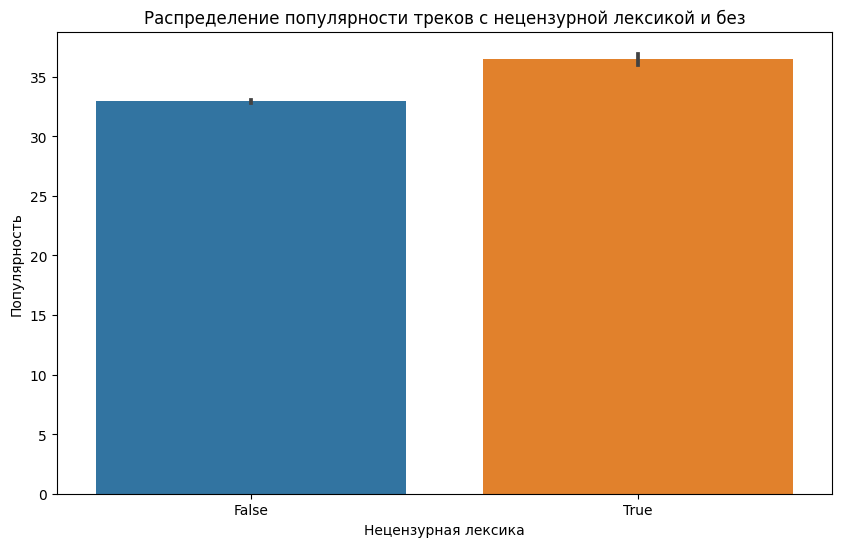

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_spotify, x='explicit', y='popularity')
plt.title("Распределение популярности треков с нецензурной лексикой и без")
plt.xlabel("Нецензурная лексика")
plt.ylabel("Популярность")
plt.show()

**ВЫВОД: Треки, содержащие нецензурную лексику, демонстрируют немного более высокий средний уровень популярности по сравнению с треками, в которых отсутствуют такие выражения. Разница между средними уровнями популярности незначительна, что указывает на то, что наличие нецензурной лексики не является ключевым фактором популярности, хотя в некоторых случаях может незначительно коррелировать с ней. Нецензурная лексика в песнях не является решающим фактором популярности, но может немного её увеличивать. Этот показатель может зависеть от других факторов, таких как жанр или стиль исполнителя.**

# **Корреляционный анализ**

In [60]:
# Выборка числовых столбцов для корреляционного анализа
numerical_columns = df_spotify.select_dtypes(include=['number'])
numerical_columns

Unnamed: 0  popularity  duration_ms  danceability  energy  key  \
0                0          73       230666         0.676  0.4610    1   
1                1          55       149610         0.420  0.1660    1   
2                2          57       210826         0.438  0.3590    0   
3                3          71       201933         0.266  0.0596    0   
4                4          82       198853         0.618  0.4430    2   
...            ...         ...          ...           ...     ...  ...   
113995      113995          21       384999         0.172  0.2350    5   
113996      113996          22       385000         0.174  0.1170    0   
113997      113997          22       271466         0.629  0.3290    0   
113998      113998          41       283893         0.587  0.5060    7   
113999      113999          22       241826         0.526  0.4870    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0       0.1430        0.0322          0.000001    0.3580   
1        -17.235     1       0.0763        0.9240          0.000006    0.1010   
2         -9.734     1       0.0557        0.2100          0.000000    0.1170   
3        -18.515     1       0.0363        0.9050          0.000071    0.1320   
4         -9.681     1       0.0526        0.4690          0.000000    0.0829   
...          ...   ...          ...           ...               ...       ...   
113995   -16.393     1       0.0422        0.6400          0.928000    0.0863   
113996   -18.318     0       0.0401        0.9940          0.976000    0.1050   
113997   -10.895     0       0.0420        0.8670          0.000000    0.0839   
113998   -10.889     1       0.0297        0.3810          0.000000    0.2700   
113999   -10.204     0       0.0725        0.6810          0.000000    0.0893   

        valence    tempo  time_signature  
0        0.7150   87.917               4  
1        0.2670   77.489               4  
2        0.1200   76.332               4  
3        0.1430  181.740               3  
4        0.1670  119.949               4  
...         ...      ...             ...  
113995   0.0339  125.995               5  
113996   0.0350   85.239               4  
113997   0.7430  132.378               4  
113998   0.4130  135.960               4  
113999   0.7080   79.198               4  

[113999 rows x 15 columns]

In [61]:
# Матрица корреляции
correlation_matrix = numerical_columns.corr()
correlation_matrix

Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.032146    -0.032738      0.003445 -0.055993   
popularity          0.032146    1.000000    -0.007129      0.035444  0.001053   
duration_ms        -0.032738   -0.007129     1.000000     -0.073435  0.058520   
danceability        0.003445    0.035444    -0.073435      1.000000  0.134325   
energy             -0.055993    0.001053     0.058520      0.134325  1.000000   
key                -0.005521   -0.003847     0.008123      0.036470  0.048007   
loudness           -0.027307    0.050420    -0.003475      0.259076  0.761690   
mode                0.005110   -0.013948    -0.035581     -0.069224 -0.078365   
speechiness        -0.084952   -0.044930    -0.062605      0.108625  0.142508   
acousticness        0.076837   -0.025458    -0.103770     -0.171531 -0.733908   
instrumentalness   -0.070285   -0.095147     0.124364     -0.185608 -0.181880   
liveness            0.033641   -0.005397     0.010308     -0.131620  0.184795   
valence             0.053109   -0.040522    -0.154464      0.477347  0.258937   
tempo              -0.025825    0.013212     0.024356     -0.050448  0.247852   
time_signature     -0.021115    0.031076     0.018229      0.207219  0.187127   

                       key  loudness      mode  speechiness  acousticness  \
Unnamed: 0       -0.005521 -0.027307  0.005110    -0.084952      0.076837   
popularity       -0.003847  0.050420 -0.013948    -0.044930     -0.025458   
duration_ms       0.008123 -0.003475 -0.035581    -0.062605     -0.103770   
danceability      0.036470  0.259076 -0.069224     0.108625     -0.171531   
energy            0.048007  0.761690 -0.078365     0.142508     -0.733908   
key               1.000000  0.038591 -0.135911     0.020419     -0.040942   
loudness          0.038591  1.000000 -0.041768     0.060826     -0.589804   
mode             -0.135911 -0.041768  1.000000    -0.046535      0.095568   
speechiness       0.020419  0.060826 -0.046535     1.000000     -0.002184   
acousticness     -0.040942 -0.589804  0.095568    -0.002184      1.000000   
instrumentalness -0.006821 -0.433478 -0.049961    -0.089617      0.104033   
liveness         -0.001597  0.076897  0.014004     0.205218     -0.020693   
valence           0.034099  0.279851  0.021964     0.036637     -0.107081   
tempo             0.010914  0.212447  0.000572     0.017274     -0.208231   
time_signature    0.015064  0.191992 -0.024090    -0.000011     -0.176142   

                  instrumentalness  liveness   valence     tempo  \
Unnamed: 0               -0.070285  0.033641  0.053109 -0.025825   
popularity               -0.095147 -0.005397 -0.040522  0.013212   
duration_ms               0.124364  0.010308 -0.154464  0.024356   
danceability             -0.185608 -0.131620  0.477347 -0.050448   
energy                   -0.181880  0.184795  0.258937  0.247852   
key                      -0.006821 -0.001597  0.034099  0.010914   
loudness                 -0.433478  0.076897  0.279851  0.212447   
mode                     -0.049961  0.014004  0.021964  0.000572   
speechiness              -0.089617  0.205218  0.036637  0.017274   
acousticness              0.104033 -0.020693 -0.107081 -0.208231   
instrumentalness          1.000000 -0.079896 -0.324310 -0.050328   
liveness                 -0.079896  1.000000  0.019093  0.000603   
valence                  -0.324310  0.019093  1.000000  0.078269   
tempo                    -0.050328  0.000603  0.078269  1.000000   
time_signature           -0.082580 -0.023649  0.133685  0.066640   

                  time_signature  
Unnamed: 0             -0.021115  
popularity              0.031076  
duration_ms             0.018229  
danceability            0.207219  
energy                  0.187127  
key                     0.015064  
loudness                0.191992  
mode                   -0.024090  
speechiness            -0.000011  
acousticness           -0.176142  
instrumentalne

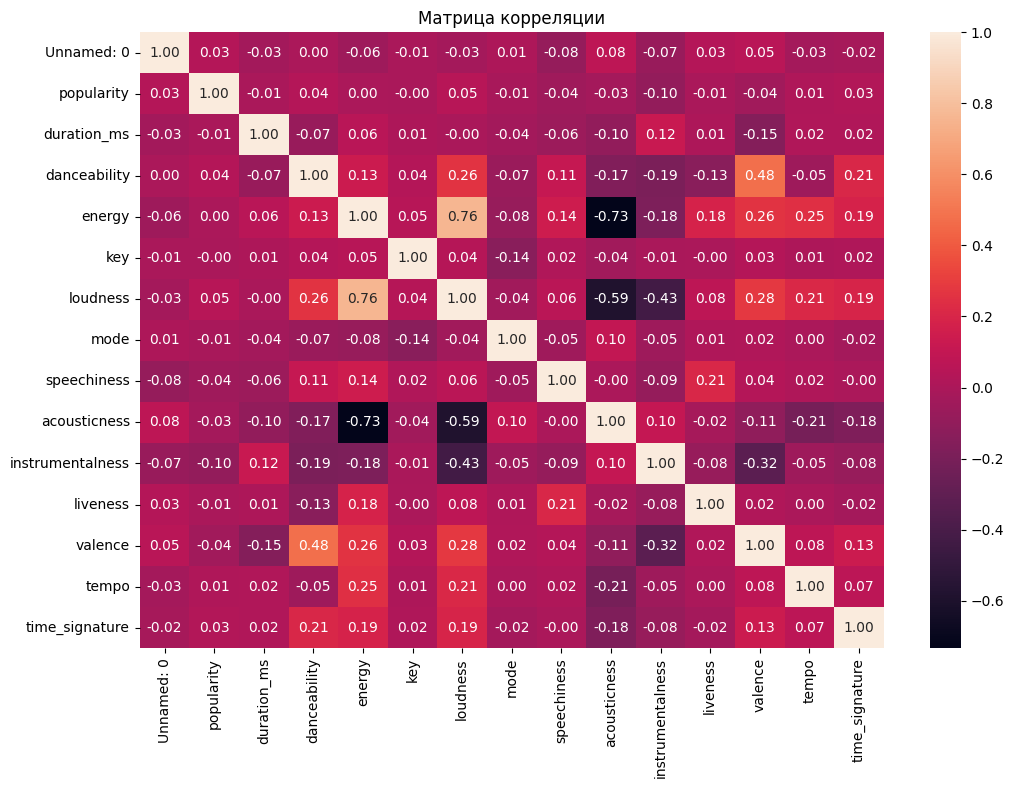

In [62]:
# Построение матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()
# Из этой матрицы можно увидеть, какие признаки имеют сильную корреляцию между собой

**ВЫВОД: Наибольшая корреляция наблюдается между параметрами loudness и energy. Она составляет 0.76 и значит данные параметры наиболее созавсимы. Можно сделать вывод что энергичные треки более громкие, что является разумным и логичным. Также вторыми параметрами имеющими наибольшую корреляционную зависимость являются valence и danceability - 0,48. Что тоже является логичным, чем более жизнерадостная песня, тем больше под нее хочется танцевать.
Большинство параметров имеют низкую корреляцию практически равную нулю, но некоторые такие как acoustiness и energy имеют отрицательную коррелюцию. Это связано с тем, что акустичность трека никак не влияет на его энергию**

# ОБЩИЙ ВЫВОД: Понимание корреляций между параметрами позволяет улучшить дальнейшее моделирование и выбор признаков для дальнейшего анализа, так как признаки с большой корреляцией можно объединить или учитывать их зависимость.

# **Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.**

In [70]:
# Создание новых признаков
# Оценка сложности трека, основанная на числе переходов между аккордами, разнообразии инструментов и динамике изменения темпа.
df_spotify['song_complexity'] = df_spotify['danceability'] * df_spotify['energy'] * (1 - df_spotify['acousticness'])
# Длительность трека в минутах
df_spotify['duration_min'] = df_spotify['duration_ms'] / 60000
# Энергия и танцевабельность
df_spotify['energy_danceability_interaction'] = df_spotify['energy'] * df_spotify['danceability']
# Нормализованная громкость
df_spotify['loudness_norm'] = df_spotify['loudness'] / df_spotify['loudness'].max()
# Показатель количества совместных исполнителей, который может указывать на влияние коллабораций на популярность трека.
df_spotify['collaboration_factor'] = df_spotify['artists'].apply(lambda x: len(x.split(',')))

In [71]:
# Выборка числовых столбцов для корреляционного анализа
numerical_columns = df_spotify.select_dtypes(include=['number'])
numerical_columns

Unnamed: 0  popularity  duration_ms  danceability  energy  key  \
0                0          73       230666         0.676  0.4610    1   
1                1          55       149610         0.420  0.1660    1   
2                2          57       210826         0.438  0.3590    0   
3                3          71       201933         0.266  0.0596    0   
4                4          82       198853         0.618  0.4430    2   
...            ...         ...          ...           ...     ...  ...   
113995      113995          21       384999         0.172  0.2350    5   
113996      113996          22       385000         0.174  0.1170    0   
113997      113997          22       271466         0.629  0.3290    0   
113998      113998          41       283893         0.587  0.5060    7   
113999      113999          22       241826         0.526  0.4870    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0       0.1430        0.0322          0.000001    0.3580   
1        -17.235     1       0.0763        0.9240          0.000006    0.1010   
2         -9.734     1       0.0557        0.2100          0.000000    0.1170   
3        -18.515     1       0.0363        0.9050          0.000071    0.1320   
4         -9.681     1       0.0526        0.4690          0.000000    0.0829   
...          ...   ...          ...           ...               ...       ...   
113995   -16.393     1       0.0422        0.6400          0.928000    0.0863   
113996   -18.318     0       0.0401        0.9940          0.976000    0.1050   
113997   -10.895     0       0.0420        0.8670          0.000000    0.0839   
113998   -10.889     1       0.0297        0.3810          0.000000    0.2700   
113999   -10.204     0       0.0725        0.6810          0.000000    0.0893   

        valence    tempo  time_signature  song_complexity  duration_min  \
0        0.7150   87.917               4         0.301601      3.844433   
1        0.2670   77.489               4         0.005299      2.493500   
2        0.1200   76.332               4         0.124221      3.513767   
3        0.1430  181.740               3         0.001506      3.365550   
4        0.1670  119.949               4         0.145374      3.314217   
...         ...      ...             ...              ...           ...   
113995   0.0339  125.995               5         0.014551      6.416650   
113996   0.0350   85.239               4         0.000122      6.416667   
113997   0.7430  132.378               4         0.027523      4.524433   
113998   0.4130  135.960               4         0.183857      4.731550   
113999   0.7080   79.198               4         0.081716      4.030433   

        energy_danceability_interaction  loudness_norm  collaboration_factor  
0                              0.311636      -1.488526                     1  
1                              0.069720      -3.802957                     1  
2                              0.157242      -2.147838                     1  
3                              0.015854      -4.085393                     1  
4                              0.273774      -2.136143                     1  
...                                 ...            ...                   ...  
113995                         0.040420      -3.617167                     1  
113996                         0.020358      -4.041924                     1  
113997                         0.206941      -2.404016                     1  
113998                         0.297022      -2.402692                     1  
113999                         0.256162      -2.251545                     1  

[113999 rows x 20 columns]

In [73]:
# Матрица корреляции
correlation_matrix = numerical_columns.corr()
correlation_matrix

Unnamed: 0  popularity  duration_ms  \
Unnamed: 0                         1.000000    0.032146    -0.032738   
popularity                         0.032146    1.000000    -0.007129   
duration_ms                       -0.032738   -0.007129     1.000000   
danceability                       0.003445    0.035444    -0.073435   
energy                            -0.055993    0.001053     0.058520   
key                               -0.005521   -0.003847     0.008123   
loudness                          -0.027307    0.050420    -0.003475   
mode                               0.005110   -0.013948    -0.035581   
speechiness                       -0.084952   -0.044930    -0.062605   
acousticness                       0.076837   -0.025458    -0.103770   
instrumentalness                  -0.070285   -0.095147     0.124364   
liveness                           0.033641   -0.005397     0.010308   
valence                            0.053109   -0.040522    -0.154464   
tempo                             -0.025825    0.013212     0.024356   
time_signature                    -0.021115    0.031076     0.018229   
song_complexity                   -0.060485   -0.009923     0.060160   
duration_min                      -0.032738   -0.007129     1.000000   
energy_danceability_interaction   -0.028909    0.006054     0.014236   
loudness_norm                     -0.027307    0.050420    -0.003475   
collaboration_factor               0.039073   -0.000198    -0.013864   

                                 danceability    energy       key  loudness  \
Unnamed: 0                           0.003445 -0.055993 -0.005521 -0.027307   
popularity                           0.035444  0.001053 -0.003847  0.050420   
duration_ms                         -0.073435  0.058520  0.008123 -0.003475   
danceability                         1.000000  0.134325  0.036470  0.259076   
energy                               0.134325  1.000000  0.048007  0.761690   
key                                  0.036470  0.048007  1.000000  0.038591   
loudness                             0.259076  0.761690  0.038591  1.000000   
mode                                -0.069224 -0.078365 -0.135911 -0.041768   
speechiness                          0.108625  0.142508  0.020419  0.060826   
acousticness                        -0.171531 -0.733908 -0.040942 -0.589804   
instrumentalness                    -0.185608 -0.181880 -0.006821 -0.433478   
liveness                            -0.131620  0.184795 -0.001597  0.076897   
valence                              0.477347  0.258937  0.034099  0.279851   
tempo                               -0.050448  0.247852  0.010914  0.212447   
time_signature                       0.207219  0.187127  0.015064  0.191992   
song_complexity                      0.486160  0.767944  0.051613  0.591319   
duration_min                        -0.073435  0.058520  0.008123 -0.003475   
energy_danceability_interaction      0.677995  0.771199  0.055542  0.645688   
loudness_norm                        0.259076  0.761690  0.038591  1.000000   
collaboration_factor                -0.013378 -0.021446 -0.000774 -0.024104   

                                     mode  speechiness  acousticness  \
Unnamed: 0                       0.005110    -0.084952      0.076837   
popularity                      -0.013948    -0.044930     -0.025458   
duration_ms                     -0.035581    -0.062605     -0.103770   
danceability                    -0.069224     0.108625     -0.171531   
energy                          -0.078365     0.142508     -0.733908   
key                             -0.135911     0.020419     -0.040942   
loudness                        -0.041768     0.060826     -0.589804   
mode                             1.000000    -0.046535      0.095568   
speechiness                     -0.046535     1.000000     -0.002184   
acousticness                     0.095568    -0.002184      1.000000   
instrumentalness                -0.049961    -0.089617      0.104033

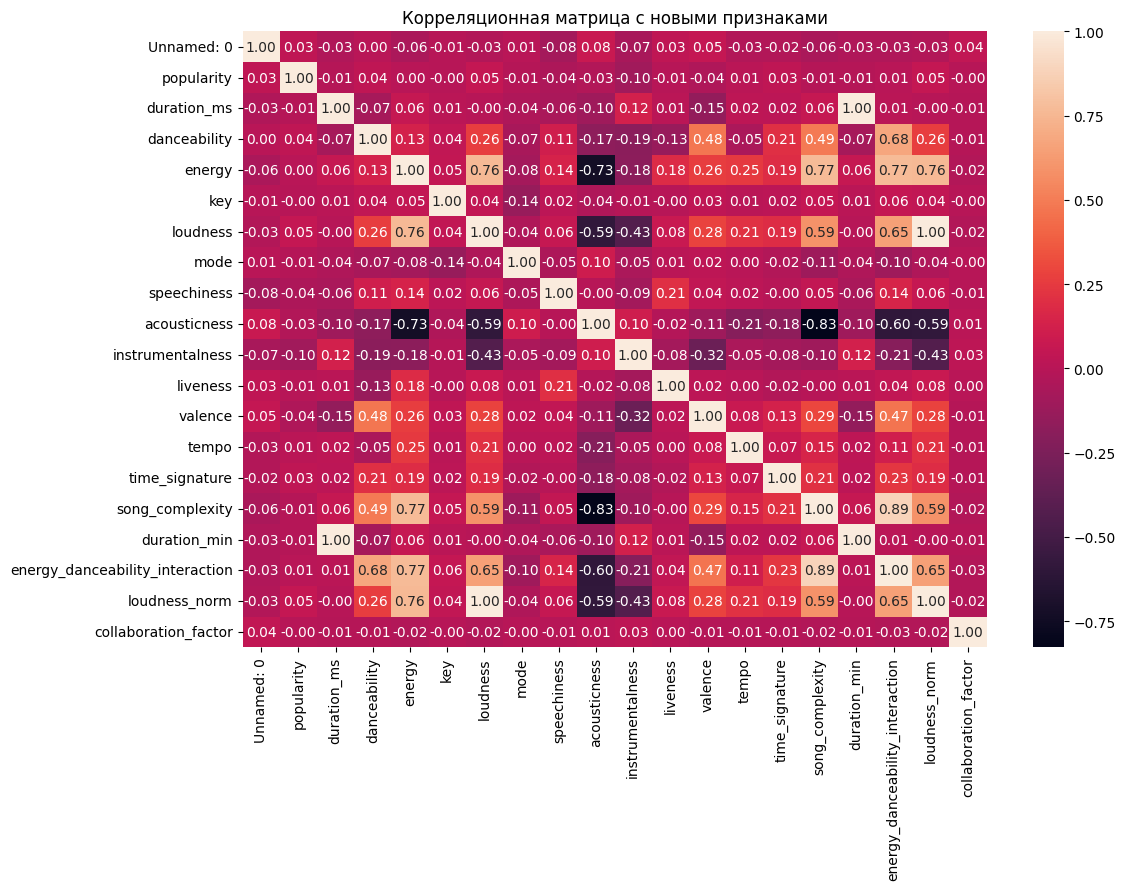

In [74]:
# Матрица корреляции с новыми признаками
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Корреляционная матрица с новыми признаками')
plt.show()

# Оценим корелляцию новых признаков с каждым из уже существующих:
# Оценка сложности трека
**song_complexity - имеет большую корреляцию с такими признаками как: energy (0,77) и danceability (0,49), что является логичным, так как при создании данного признака были использованы эти параметры, и низкую корреляцию с acousticness (-0,83), так как данный параметр был взят в обратной пропорции при создании.**
# Длительность трека в минутах
**duration_min - имеет коррелюцию равную 1 с параметром duration_min, так как данный параментр является просто переводом в другую единицу измерения времени**
# Энергия и танцевабельность
**energy_danceability_interaction - имеет большую корреляцию с такими признаками как: energy (0,77) и danceability (0,68) и loudness (0,65),что логично, так как первые два параметра были использованы для создания этого, и чем более громкая песня, тем она энергичнее и под нее легче танцуется, и низкую корреляцию с acousticness (-0,60) так как данный параметры никак друг на друга не влияют**
# Нормализованная громкость
**loudness_norm - имеет коррелюцию равную 1 с параметром loudness, так как является параметром основанным на нем. Также его корреляция с остальными признаками совпадает с loudness, что делает его по сути бесполезным, но ради опыта я решила его оставить.**
# Показатель количества совместных исполнителей, который может указывать на влияние коллабораций на популярность трека.
**collaboration_factor - практически ни на что не влияет, корреляция со всеми признаками равна +- 0**

# **Создание набора признаков для модели**

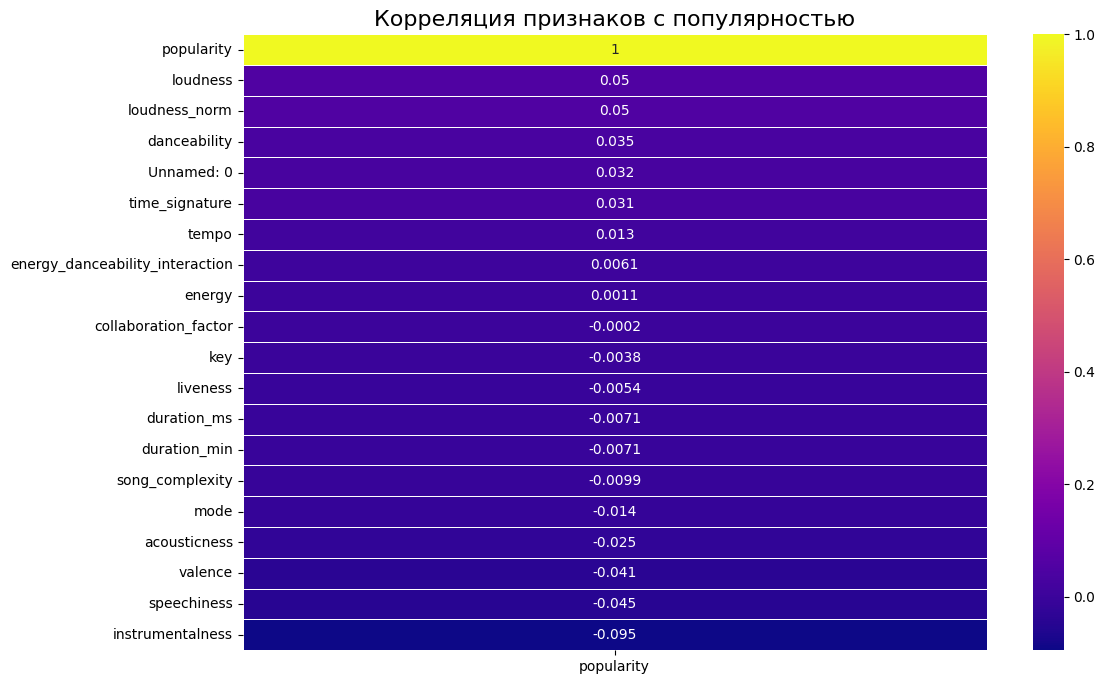

popularity                         1.000000
loudness                           0.050420
loudness_norm                      0.050420
danceability                       0.035444
Unnamed: 0                         0.032146
time_signature                     0.031076
tempo                              0.013212
energy_danceability_interaction    0.006054
energy                             0.001053
collaboration_factor              -0.000198
key                               -0.003847
liveness                          -0.005397
duration_ms                       -0.007129
duration_min                      -0.007129
song_complexity                   -0.009923
mode                              -0.013948
acousticness                      -0.025458
valence                           -0.040522
speechiness                       -0.044930
instrumentalness                  -0.095147
Name: popularity, dtype: float64


In [77]:
from sklearn.preprocessing import LabelEncoder
categorical_features = df_spotify.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df_spotify[col] = le.fit_transform(df_spotify[col])
    
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
    annot=True, annot_kws={"size": 10},
    cmap='plasma',
    cbar=True,
    linewidths=0.5
)
plt.title('Корреляция признаков с популярностью', fontsize=16)
plt.show()

top_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(top_correlations)

# **Обучение модели**

# Метрики до введения новых признаков

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo', "danceability", "energy",
]

X = df_spotify[features]
y = df_spotify['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = linear_model.predict(X_test)

# Метрики
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 18.413271877038326
Mean Squared Error (MSE): 485.60588010154515
Root Mean Squared Error (RMSE): 22.036467051266296
Mean Absolute Percentage Error (MAPE): 2.1473758543786348e+16
R^2 Score: 0.02113246490901577


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

selected_features = [
                    'loudness','song_complexity','energy_danceability_interaction','loudness_norm',
                    'explicit','danceability','collaboration_factor','duration_min']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_spotify[selected_features], df_spotify['popularity'], test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Метрики
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 18.709156352360512
Mean Squared Error (MSE): 492.1532016757027
Root Mean Squared Error (RMSE): 22.1845261764975
Mean Absolute Percentage Error (MAPE): 2.1258763999079777e+18
R^2 Score: 0.007934600563955896


# **ВЫВОД:**
**Средняя абсолютная ошибка (MAE)** равна 18.71, что не сильно отличается от изначального резултата. Это значение указывает на то, что в среднем предсказания модели отклоняются от фактических значений на 18.71 единиц.
показывает, что в среднем ошибки предсказаний модели составляют примерно 22.18 единиц.

**Средняя квадратичная ошибка (MSE)** составляет 492.15, что тоже ненамного больше чем в первом случае. Это указывает на то, что модель испытывает довольно значительные ошибки, так как MSE не только учитывает величину ошибок, но и их квадрат, что увеличивает влияние больших ошибок.

**Корень из средней квадратичной ошибки (RMSE)** равен 22.18 (не сильно отличается от предыдущего значения). Это значение хорошо интерпретируется и 

**Средняя абсолютная процентная ошибка (MAPE)** имеет крайне высокое значение, равное 2.1258763999079777e+18, что показывает, что модель может значительно недооценивать или переоценивать некоторые категории данных. Это  сильно влияет на точность модели.

**Коэффициент детерминации (R² Score)** равен 0.0079, что говорит о том, что модель объясняет более 99% дисперсии данных, что является плохим знаком. Это означает, что модель практически не объясняет вариации в целевой переменной, и возникает необходимость в переработке модели или ручном выборе мощных признаков.

# **Эксперименты с моделями машинного обучения/глубокого обучения.**

In [ ]:
# Разделим данные на признаки (X) и целевую переменную (y) - популярность
X = df_spotify.drop(columns = ['popularity'], axis = 1)
y = df_spotify['popularity']

In [ ]:
label_encoder = LabelEncoder()
# Кодируем категориальные переменные
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Умножим на -1 потому что sklearn вычисляет *отрицательное* MAE

In [ ]:
from sklearn.model_selection import cross_val_score
#Линейная регрессия
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_predict = linear_regression.predict(X_test)

predicted_categories = pd.cut(y_predict, bins=[-np.inf, 0, 100, np.inf], labels=[0, 1, 2])
actual_categories = pd.cut(y_test, bins=[-np.inf, 0, 100, np.inf], labels=[0, 1, 2])

# Точнность модели
accuracy = accuracy_score(actual_categories, predicted_categories)
print ("Accuracy: ", accuracy)

# Кросс-валидация
scores_lr = -1 * cross_val_score(linear_regression, X, y, cv=5)
print("Cross-Validation: ", scores_lr.mean())

In [ ]:
# Модель рандомного леса
random_forest = RandomForestRegressor(random_state=44)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

r2 = r2_score(y_test, y_predict)
print("Random Forest R-squared Score:", r2)

# Кросс-валидация
scores_lr = -1 * cross_val_score(random_forest, X, y, cv=5)
print("Cross-Validation: ", scores_lr.mean())

In [ ]:
# Регрессор дерева принятия решений
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
y_pred_class = np.abs(y_pred_tree - y_test)

# Точность модели
accuracy = np.mean(y_pred_class)
print("Decision Tree Accuracy:", accuracy)

# Кросс-валидация
scores = -1 * cross_val_score(tree_reg, X, y, cv=5)
print("Cross-Validation: ", scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Градиентный бустинг
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr)
print('Mean Squared Error:', {mse})

# Кросс-валидация
scores = -1 * cross_val_score(gbr, X, y, cv=5)
print("Cross-Validation: ", scores.mean())

In [ ]:
from sklearn.neural_network import MLPRegressor
# Нейронные сети
model_nn = MLPRegressor(max_iter=1000)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

# Кросс-валидация
scores_nn = -1 * cross_val_score(model_nn, X, y, cv=5)
print("Нейронные сети - Средняя точность:", scores_nn.mean())